In [1]:
import pandas as pd
import numpy as np
import pymysql
from datetime import date

In [2]:
file_path = "/root/Software/Config/mysql_password.txt"
f = open(file_path, "r")
key_password_dict = {}
for x in f:
    key_password_pair = x.strip().split(":")
    key_password_dict[key_password_pair[0]] = key_password_pair[1]

f.close()

In [3]:
key_password_dict

{'user': 'rzdong',
 'passwd': '13ProDrzusa!',
 'host': 'rm-cn-lbj3krxah000kh2o.rwlb.rds.aliyuncs.com',
 'port': '3306',
 'database': 'Gemini'}

### HTML

In [4]:
# encoding:utf-8
# python3.0
import urllib.request

# 定义一个getHtml()函数
def getHtml(url):
    # HEADERS = {'cookie':'als=0; sessid=E20EF245-B578-B62A-405F-2E2EC80DD166; ajk_boostup_captcha=0e5106912b04695c71d190f8987ebf1a; ajk_member_captcha=6f503b9a45c529f8f1e53c34c8705def; search_words=%E5%A4%A7%E6%9C%89%E6%81%AC%E5%9B%AD%E4%BA%8C%E6%9C%9F%7C%E5%93%88%E4%BD%9B%E6%98%A0%E5%83%8F%7C%E5%A4%A7%E6%9C%89%E6%81%AC%E5%9B%AD; viewed_comm_21=212476_512034_538146_212341_212176; viewed_comm_list=212511_212476_512034_538146_212341_212176; ajk_member_name=%E8%80%80%E4%B8%AD; ajk_member_key=146c25ce41adc687f802173e10684b46; ajk_member_time=1519886340; aQQ_ajkauthinfos=X%2BvioYvshCNej0r1lQljTMj209xwrTWPFZHr4fU%2BBOVshg2FIa%2FwG804Z%2F5D0RBECPh2dBsrAQ; lui=34603604%3A1; ajk_member_id=34603604; lps=http%3A%2F%2Fdalian.anjuke.com%2F%7C; ctid=21; chatconf=0.1488850300876.2017094.755457675.2005134818.21; browse_comm_ids=512034%7C512033; propertys=chs2vf-omfh2s_cg0a1c-omfbnv_; 58tj_uuid=6bf94a05-49db-441c-a82b-7c6f0fd10568; new_session=0; init_refer=; new_uv=4; __xsptplusUT_8=1; _ga=GA1.2.846449226.1488850146; _gat=1; __xsptplus8=8.4.1488863765.1488864393.3%234%7C%7C%7C%7C%7C%23%23sBxkSJUmyzzeOfmsql0wujs4qe1wUNkI%23; aQQ_ajkguid=81A92F38-8AFB-3CD1-F259-78F93B4E9AE5; twe=2',}
    HEADERS = {
        'User-Agent': 'User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36'}
    HEADERS = {'User-Agent': 'User-Agent:Mozilla/5.0'}
    req = urllib.request.Request(url, headers=HEADERS)
    page = urllib.request.urlopen(req)  # urllib.urlopen()方法用于打开一个URL地址
    html = page.read()  # read()方法用于读取URL上的数据
    return html.decode('UTF-8').replace(u'\xa9', u'').replace("'", "").replace("\r\n", "").replace("\n", "")  # 汉字转换及正则匹配无法对换行进行处理及去掉单引号


In [5]:
beike1 = getHtml('''https://bj.ke.com/ershoufang/tongzhou/co32ba80ea100bp251ep499/''')

'<!DOCTYPE html><html class="" lang="en"><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0" /><!-- 2017.11.8 市场需求加上新的统计 --><script>  ljConf = {      city_id: 110000,      city_abbr: bj,      city_name: 北京,      channel: ershoufang,      page: ershoufang_search,      pageConfig: {"ajaxroot":"\\/\\/ajax.api.ke.com\\/","imAppid":"BEIKE_WEB_20170105","imAppkey":"2d7e19fe599aa5087b4d46948e552e89"},      feroot: //s1.ljcdn.com/pegasus/,      ferootnew: //s1.ljcdn.com/pegasus/,      domainConfig: {"webroot":"\\/\\/bj.ke.com\\/","wwwroot":"\\/\\/www.ke.com\\/","ajaxapiroot":"https:\\/\\/ajax.api.ke.com\\/","apiroot":"\\/\\/ajax.ke.com\\/","festaticroot":"\\/\\/cms.ke.com\\/static\\/","videoroot":"\\/\\/video.ljcdn.com\\/","feroot":"\\/\\/s1.ljcdn.com\\/pegasus\\/","ferootnew":"\\/\\/s1.ljcdn.com\\/pegasus\\/","newsroot":"\\/\\/news.ke.com\\/","userroot":"\\/\\/user.ke.com\\/","fangroo
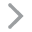

In [6]:
beike1

In [7]:
# encoding:utf-8

from html.parser import HTMLParser


class BeikeParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # 存储中间数据（链家为总房价与单价）
        self.span = ""
        # 房屋名称
        self.houseName = []
        # 小区名称
        self.villageName = []
        # 房子介绍
        self.houseNote = []
        # 总价
        self.houseTotlePrice = []
        self.houseTotlePrice_tmp = ""
        # 单价
        self.houseUnitPrice = []
        # 房屋链接
        self.houseLink = []
        # 第一张图片
        self.houseImg = []
        # 关注人数
        self.followNum = []
        # 城市缩写
        self.city = []
        # 用于标记数据类型
        self.flag = []
        self.sign = 0

    def feed(self, data):
        super().feed(data)
        # 校验数据个数是否统一
        size = len(self.houseName)
        if len(self.houseName) != size \
            or len(self.villageName) != size \
            or len(self.houseNote) != size \
            or len(self.houseTotlePrice) != size \
            or len(self.houseUnitPrice) != size \
            or len(self.houseLink) != size \
            or len(self.houseImg) != size \
            or len(self.followNum) != size \
                or len(self.city) != size:
            raise ValueError(
                "数据个数不一致：houseName-" + str(len(self.houseName)) +
                ",villageName-" + str(len(self.villageName)) +
                ",houseNote-" + str(len(self.houseNote)) +
                ",houseTotlePrice-" + str(len(self.houseTotlePrice)) +
                ",houseUnitPrice-" + str(len(self.houseUnitPrice)) +
                ",houseLink-" + str(len(self.houseLink)) +
                ",houseImg-" + str(len(self.houseImg)) +
                ",followNum-" + str(len(self.followNum)) +
                ",city-" + str(len(self.city))
                    )
        return self.houseName, \
            self.villageName, \
            self.houseNote, \
            self.houseTotlePrice, \
            self.houseUnitPrice, \
            self.houseLink, \
            self.houseImg, \
            self.followNum, \
            self.city,

    def handle_starttag(self, tag, attrs):
        if tag == "span":
            if ("class", "houseIcon") in attrs:
                self.flag.append("houseNote")
            self.flag.append("span")
        elif tag == "a" and\
                ("class", "img VIEWDATA CLICKDATA maidian-detail") in attrs:
            # self.flag.append("houseName")
            for attr in attrs:
                if attr[0] == "title":
                    self.houseName.append(attr[1])
                elif attr[0] == "href":
                    house_link = attr[1]
                    city = house_link[
                        house_link.find('//')+2:house_link.find('ke.com')-1
                        ].upper()
                    self.houseLink.append(house_link)
                    self.city.append(city)
        # elif tag == "a" and ("data-el", "region") in attrs:
        #     self.flag.append("villageName")
        # elif tag == "a" and ("class", "no_resblock_a") in attrs:
        #     self.flag.append("villageName")
        # elif tag == "div" and ("class", "houseInfo") in attrs:
        #     self.flag.append("houseNote")
        elif tag == "div" and ("class", "totalPrice totalPrice2") in attrs:
            self.flag.append("houseTotlePrice_2")
        elif tag == "div" and ("class", "unitPrice") in attrs:
            self.flag.append("houseUnitPrice_2")
        elif tag == "img" and ("class", "lj-lazy") in attrs:
            for attr in attrs:
                if attr[0] == "alt":
                    for attr2 in attrs:
                        if attr2[0] == "data-original":
                            self.houseImg.append(attr2[1])
                            break
                    break
        elif tag == "div" and ("class", "positionInfo") in attrs:
            self.flag.append("villageName_1")
        elif tag == "a" and\
            len(self.flag) > 0 and\
                self.flag[-1] == "villageName_1":
            self.flag.pop()
            self.flag.append("villageName_2")
        elif tag == "div" and ("class", "followInfo") in attrs:
            self.flag.append("followNum")

    def handle_data(self, data):
        data = data.replace(' ', '')
        if len(self.flag) > 0:
            if self.flag[-1] == "span":
                self.span = data
                self.flag.pop()
                if len(self.flag) > 0 and self.flag[-1] == "houseUnitPrice_2":
                    self.houseUnitPrice.append(self.span)
                    self.flag.pop()
                elif len(self.flag) > 0 and self.flag[-1] == "houseNote":
                    self.houseNote.append(self.span)
                    # self.villageName.append(self.span.split('|')[0].strip())
                    self.flag.pop()
                elif len(self.flag) > 0 and self.flag[-1] == "followNum":
                    self.followNum.append(
                        int(self.span.replace(' ', '').split('人')[0]))
                    self.flag.pop()
                elif len(self.flag) > 0 and\
                        self.flag[-1] == "houseTotlePrice_2":
                    self.houseTotlePrice_tmp = self.span
                    # self.villageName.append(self.span.split('|')[0].strip())
            elif self.flag[-1] == "houseName":
                # print(str(data))
                self.houseName.append(data)
                self.flag.pop()
            # elif self.flag[-1] == "villageName":
            #     # print(str(data))
            #     self.villageName.append(data)
            #     self.flag.pop()
            # elif self.flag[-1] == "houseNote":
            #     print(self.span)
            #     self.houseNote.append(self.span)
            #     self.villageName.append(self.span.split('|')[0])
            #     self.span = ""
            #     self.flag.pop()
            elif self.flag[-1] == "houseTotlePrice_2":
                if data != "":
                    self.houseTotlePrice_tmp = \
                        self.houseTotlePrice_tmp + self.span + data
                self.span = ""
                # self.flag.pop()
            elif self.flag[-1] == "villageName_2":
                # print(str(data))
                self.villageName.append(data)
                self.flag.pop()

    def handle_endtag(self, tag):
        if tag == "div" \
            and len(self.flag) > 0 \
                and self.flag[-1] == "houseTotlePrice_2":
            self.houseTotlePrice.append(
                self.houseTotlePrice_tmp
                )
            self.houseTotlePrice_tmp = ""
            self.flag.pop()


In [8]:
%%time
beike = BeikeParser()
houseName, villageName, houseNote, houseTotalPrice, houseUnitPrice, houseLink, houseImg, followNum, city = beike.feed(beike1)

CPU times: user 40.1 ms, sys: 0 ns, total: 40.1 ms
Wall time: 40.1 ms


In [9]:
res = pd.DataFrame(
    {
        'CalendarDate': str(date.today()),
        'webName': '贝壳',
        'houseName': houseName,
        'villageName': villageName,
        'houseNote': houseNote,
        'houseTotalPrice': houseTotalPrice,
        'houseUnitPrice': houseUnitPrice,
        'houseLink': houseLink,
        'houseImg': houseImg,
        'followNum': followNum,
        'city': city,
    }
)

res['houseTotalPrice'] = res['houseTotalPrice'].apply(lambda x: int(x[:-1]) * 10000)
res['houseUnitPrice'] = res['houseUnitPrice'].apply(lambda x: int(x[:-3].replace(',','')))

### HTML Parser

In [10]:
beike_first_page = getHtml('''https://bj.ke.com/ershoufang/tongzhou/co32ba80ea100bp251ep499/''')

In [11]:
class BeiKeParseBaseInfo(HTMLParser):
    def __init__(self):
        super().__init__()
        self.totalPage = 1

    def handle_starttag(self, tag, attrs):
        if tag == "div" and ("class", "page-box house-lst-page-box") in attrs:
            print("Encountered a start tag:", tag)
            # print("Encountered a page-data attr:", attrs)
            for attr in attrs:
                if attr[0] == 'page-data':
                    print(eval(attr[1])['totalPage'])
                    self.totalPage = eval(attr[1])['totalPage']

    def handle_endtag(self, tag):
        pass

    def handle_data(self, data):
        pass

In [12]:
parser = BeiKeParseBaseInfo()
parser.feed(beike_first_page)

parser.totalPage

Encountered a start tag: div
79


79

In [13]:
test_html = 'https://sh.ke.com/ershoufang/putuo/pg1y4l3l4/'

In [14]:
test_html_list = test_html.split('/')

In [15]:
test_html_list[-2] = 'pg2' + test_html_list[-2]

In [16]:
'/'.join(test_html_list)

'https://sh.ke.com/ershoufang/putuo/pg2pg1y4l3l4/'

In [17]:
from datetime import date

today = str(date.today())
print("Today's date:", today)

Today's date: 2024-01-28


In [18]:
key_password_dict = {}
file_path = "/root/Software/Config/mysql_password.txt"
f = open(file_path, "r")
for x in f:
    key_password_pair = x.strip().split(":")
    key_password_dict[key_password_pair[0]] = key_password_pair[1]

In [19]:
key_password_dict

{'user': 'rzdong',
 'passwd': '13ProDrzusa!',
 'host': 'rm-cn-lbj3krxah000kh2o.rwlb.rds.aliyuncs.com',
 'port': '3306',
 'database': 'Gemini'}

In [20]:
host = key_password_dict['host']
port = int(key_password_dict['port'])
user = key_password_dict['user']
passwd = key_password_dict['passwd']
database = key_password_dict['database']

conn = pymysql.connect(host=host, port=port, user=user, passwd=passwd, db=database, charset='utf8')
cursor = conn.cursor()

In [35]:
type(cursor)

pymysql.cursors.Cursor

In [30]:
from sqlalchemy import create_engine
import pandas as pd

MYSQL_HOST = key_password_dict['host']
MYSQL_PORT = int(key_password_dict['port'])
MYSQL_USER =key_password_dict['user']
MYSQL_PASSWORD = key_password_dict['passwd']
MYSQL_DB = key_password_dict['database']

engine = create_engine('mysql+pymysql://%s:%s@%s:%s/%s?charset=utf8'
                           % (MYSQL_USER, MYSQL_PASSWORD, MYSQL_HOST, MYSQL_PORT, MYSQL_DB))

In [21]:
data_cols = res.columns.to_list()

In [22]:
table_name = 'Beike_CN_Housing_Price'
insert_sql = f"""
    insert into {table_name}
    (
        {",".join(data_cols)}
    ) 
        values """

In [23]:
primary_key_columns = ['CalendarDate','City', 'webName', 'houseName', 'villageName']

In [24]:
not_primary_key_columns = [x for x in data_cols if x not in primary_key_columns]

In [25]:
res_num = res.shape[0]

In [36]:
def _save_mysql(
        db_cursor: pymysql.cursors.Cursor,
        table_name,
        data: pd.DataFrame,
        primary_key_columns,
        logger,
):
    data_cols = data.columns.to_list()
    not_primary_key_columns = [x for x in data_cols if x not in primary_key_columns]
    insert_sql = f"""
        insert into {table_name}
        (
            {",".join(data_cols)}
        ) 
            values """

    for row_num, col_value in data.iterrows():
        if row_num != 0:
            insert_sql += ","
        insert_sql += str(tuple(col_value.values.tolist()))

    insert_sql += 'AS new ON DUPLICATE KEY UPDATE '

    max_column_number = len(not_primary_key_columns) - 1
    for idx in range(len(not_primary_key_columns)):
        not_primary_key = not_primary_key_columns[idx]
        insert_sql += not_primary_key + "=" + f"new.{not_primary_key}"
        if idx != max_column_number:
            insert_sql += ','
    db_cursor.execute(insert_sql)
    db_cursor.commit()
    return

In [34]:
cursor.execute(insert_sql)

30

In [93]:
# for not_primary_key in not_primary_key_columns:
#     print(not_primary_key + "=" + f"new.{not_primary_key}")

In [94]:
print(insert_sql)


    insert into Beike_CN_Housing_Price
    (
        CalendarDate,webName,houseName,villageName,houseNote,houseTotalPrice,houseUnitPrice,houseLink,houseImg,followNum,city
    ) 
        values ('2024-01-27', '贝壳', '水仙园 2室1厅 南 北', '水仙园', '中楼层(共6层)2室1厅|84.41平米|南北', 4090000, 48454, 'https://bj.ke.com/ershoufang/101122806362.html', 'https://ke-image.ljcdn.com/110000-inspection/cf9e2899-0cfc-4494-8135-c9055eaa12a8_1000.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 1, 'BJ'),('2024-01-27', '贝壳', '一号线地铁果园站天元小区南北通透中间楼层采光好', '天元小区', '中楼层(共6层)2室1厅|91.34平米|南北', 3280000, 35910, 'https://bj.ke.com/ershoufang/101122799953.html', 'https://ke-image.ljcdn.com/110000-inspection/5ff00f3b-19b3-4003-a1f7-d8225f69fa5e_1000.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 1, 'BJ'),('2024-01-27', '贝壳', '通州万达商圈，南北通透 诚心出售 小区有中心广场', '杨庄22号院', '高楼层(共6层)2室1厅|81.71平米|南北', 2990000, 36593, 'https://bj.ke.com/ershoufang/101122799621.html', 'https://ke-image.ljcdn.com/110000-inspection/66c8a49c-9910-47b7-a100-26860b537b1b_1000.

In [73]:
print(','.join(sql_colums_string))

'CalendarDate','webName','houseName','villageName','houseNote','houseTotalPrice','houseUnitPrice','houseLink','houseImg','followNum','city'


In [74]:
for _,col in res.iterrows():
    print(_)
    print(col)
    break

0
CalendarDate                                              2024-01-27
webName                                                           贝壳
houseName                                               水仙园 2室1厅 南 北
villageName                                                      水仙园
houseNote                                    中楼层(共6层)2室1厅|84.41平米|南北
houseTotalPrice                                              4090000
houseUnitPrice                                                 48454
houseLink             https://bj.ke.com/ershoufang/101122806362.html
houseImg           https://ke-image.ljcdn.com/110000-inspection/c...
followNum                                                          1
city                                                              BJ
Name: 0, dtype: object


In [82]:
print(str(tuple(col.values.tolist())))

('2024-01-27', '贝壳', '水仙园 2室1厅 南 北', '水仙园', '中楼层(共6层)2室1厅|84.41平米|南北', 4090000, 48454, 'https://bj.ke.com/ershoufang/101122806362.html', 'https://ke-image.ljcdn.com/110000-inspection/cf9e2899-0cfc-4494-8135-c9055eaa12a8_1000.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 1, 'BJ')


In [ ]:
"""
INSERT INTO ins_duplicate VALUES (1,'Antelope') 
ON DUPLICATE KEY UPDATE animal='Antelope';
"""

In [ ]:
for i in range(0, len(houseName)):
    if i == 0:
        insert_sql += """
        ('%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s')
        """ % (
            webName, houseName[i], villageName[i], houseNote[i], 
            houseTotlePrice[i], houseUnitPrice[i],
            houseLink[i], houseImg[i], followNum[i])
    else:
        insert_sql += """,('%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s')""" % (
            webName, houseName[i], villageName[i], houseNote[i], houseTotlePrice[i], houseUnitPrice[i],
            houseLink[i], houseImg[i], followNum[i])

In [ ]:
def _save_mysql(
        data,
        mysql_cursor,
        table_name,
    ):
    insert_sql = f"""
    insert into {table_name}
    (
        {",".join(field_names)}
    ) 
        values """
    for i in range(0, len(houseName)):
        if i == 0:
            insert_sql += """
            ('%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s')
            """ % (
                webName, houseName[i], villageName[i], houseNote[i], 
                houseTotlePrice[i], houseUnitPrice[i],
                houseLink[i], houseImg[i], followNum[i])
        else:
            insert_sql += """,('%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s', '%s')""" % (
                webName, houseName[i], villageName[i], houseNote[i], houseTotlePrice[i], houseUnitPrice[i],
                houseLink[i], houseImg[i], followNum[i])
    insert_sql += """;"""
    saved_rows = 0
    if len(houseName) > 0:
        try:
            saved_rows = cursor.execute(insert_sql)
        except:
            print(insert_sql)
    print(webName + ' saved ' + str(saved_rows) + ' rows.')
    conn.commit()
    cursor.close()
    conn.close()

In [58]:
res.to_sql('Beike_CN_Housing_Price', engine, if_exists='append', index=False)

IntegrityError: (pymysql.err.IntegrityError) (1062, "Duplicate entry '2024-01-27-BJ-贝壳-水仙园 2室1厅 南 北-水仙园' for key 'Beike_CN_Housing_Price.cn_housing_id'")
[SQL: INSERT INTO `Beike_CN_Housing_Price` (`CalendarDate`, `webName`, `houseName`, `villageName`, `houseNote`, `houseTotalPrice`, `houseUnitPrice`, `houseLink`, `houseImg`, `followNum`, city) VALUES (%(CalendarDate)s, %(webName)s, %(houseName)s, %(villageName)s, %(houseNote)s, %(houseTotalPrice)s, %(houseUnitPrice)s, %(houseLink)s, %(houseImg)s, %(followNum)s, %(city)s)]
[parameters: ({'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '水仙园 2室1厅 南 北', 'villageName': '水仙园', 'houseNote': '中楼层(共6层)2室1厅|84.41平米|南北', 'houseTotalPrice': 4090000, 'houseUnitPrice': 48454, 'houseLink': 'https://bj.ke.com/ershoufang/101122806362.html', 'houseImg': 'https://ke-image.ljcdn.com/110000-inspection/cf9e2899-0cfc-4494-8135-c9055eaa12a8_1000.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 'followNum': 1, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '一号线地铁果园站天元小区南北通透中间楼层采光好', 'villageName': '天元小区', 'houseNote': '中楼层(共6层)2室1厅|91.34平米|南北', 'houseTotalPrice': 3280000, 'houseUnitPrice': 35910, 'houseLink': 'https://bj.ke.com/ershoufang/101122799953.html', 'houseImg': 'https://ke-image.ljcdn.com/110000-inspection/5ff00f3b-19b3-4003-a1f7-d8225f69fa5e_1000.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 'followNum': 1, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '通州万达商圈，南北通透 诚心出售 小区有中心广场', 'villageName': '杨庄22号院', 'houseNote': '高楼层(共6层)2室1厅|81.71平米|南北', 'houseTotalPrice': 2990000, 'houseUnitPrice': 36593, 'houseLink': 'https://bj.ke.com/ershoufang/101122799621.html', 'houseImg': 'https://ke-image.ljcdn.com/110000-inspection/66c8a49c-9910-47b7-a100-26860b537b1b_1000.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 'followNum': 0, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '富力尚悦居A区  双卧朝南  电梯房', 'villageName': '富力尚悦居A区', 'houseNote': '高楼层(共15层)2室1厅|85.59平米|南', 'houseTotalPrice': 3600000, 'houseUnitPrice': 42061, 'houseLink': 'https://bj.ke.com/ershoufang/101122799458.html', 'houseImg': 'https://s1.ljcdn.com/pegasus/redskull/images/common/default_house_list.png?_v=202401081627157', 'followNum': 1, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '中建雅颂居 3室1厅 南 北', 'villageName': '中建雅颂居', 'houseNote': '底层(共22层)|2012年|3室1厅|89.34平米|南北', 'houseTotalPrice': 2950000, 'houseUnitPrice': 33020, 'houseLink': 'https://bj.ke.com/ershoufang/101122797706.html', 'houseImg': 'https://ke-image.ljcdn.com/110000-inspection/37a07755-6882-464a-9ced-2834b650c320_1000.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 'followNum': 0, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '神龙辛屯小区  满五唯一  南北通透  大两居  全明格局', 'villageName': '神龙辛屯小区', 'houseNote': '中楼层(共6层)2室2厅|95.49平米|南北', 'houseTotalPrice': 2700000, 'houseUnitPrice': 28276, 'houseLink': 'https://bj.ke.com/ershoufang/101122797568.html', 'houseImg': 'https://ke-image.ljcdn.com/110000-inspection/pc1_zR8Y8m7RY.jpg!m_fill,w_280,h_210,f_jpg?from=ke.com', 'followNum': 0, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '通景园 2室1厅 西南', 'villageName': '通景园', 'houseNote': '高楼层(共27层)2室1厅|89.63平米|西南', 'houseTotalPrice': 3350000, 'houseUnitPrice': 37376, 'houseLink': 'https://bj.ke.com/ershoufang/101122795902.html', 'houseImg': 'https://s1.ljcdn.com/pegasus/redskull/images/common/default_house_list.png?_v=202401081627157', 'followNum': 1, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '海棠湾二期 观湖 精装修 环球影城旁 近地铁 看房方便', 'villageName': '海棠湾二期', 'houseNote': '低楼层(共21层)2室1厅|90.22平米|东南', 'houseTotalPrice': 4360000, 'houseUnitPrice': 48327, 'houseLink': 'https://bj.ke.com/ershoufang/101122795639.html', 'houseImg': 'https://s1.ljcdn.com/pegasus/redskull/images/common/default_house_list.png?_v=202401081627157', 'followNum': 0, 'city': 'BJ'}  ... displaying 10 of 30 total bound parameter sets ...  {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': '上潞园 2室2厅 南 北', 'villageName': '上潞园', 'houseNote': '低楼层(共6层)|2002年|2室2厅|93.84平米|南北', 'houseTotalPrice': 3150000, 'houseUnitPrice': 33568, 'houseLink': 'https://bj.ke.com/ershoufang/101122760700.html', 'houseImg': 'https://s1.ljcdn.com/pegasus/redskull/images/common/default_house_list.png?_v=202401081627157', 'followNum': 0, 'city': 'BJ'}, {'CalendarDate': '2024-01-27', 'webName': '贝壳', 'houseName': 'K2清水湾 2室1厅 东南', 'villageName': 'K2清水湾', 'houseNote': '低楼层(共27层)2室1厅|81.58平米|东南', 'houseTotalPrice': 4350000, 'houseUnitPrice': 53322, 'houseLink': 'https://bj.ke.com/ershoufang/101122757546.html', 'houseImg': 'https://s1.ljcdn.com/pegasus/redskull/images/common/default_house_list.png?_v=202401081627157', 'followNum': 0, 'city': 'BJ'})]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [ ]:
"""
CREATE TABLE IF NOT EXISTS  Beike_CN_Housing_Price(
            Id int auto_increment,
    		CalendarDate varchar(10) COMMENT '日期',
    		City varchar(25) COMMENT '城市',
            webName varchar(255) COMMENT '网站名称',
            houseName varchar(255) COMMENT '房屋名称',
            villageName varchar(255) COMMENT '小区',
            houseNote varchar(255) COMMENT '小区注释',
            houseTotalPrice DECIMAL(20,5) COMMENT '房屋总价',
            houseUnitPrice DECIMAL(20,5) COMMENT '房屋单价',
            houseLink varchar(255) COMMENT '链接',
            houseImg varchar(255),
            followNum varchar(255),
    		UpdateTime TIMESTAMP DEFAULT CURRENT_TIMESTAMP ON UPDATE CURRENT_TIMESTAMP,
            primary key(Id),
    		UNIQUE KEY `cn_housing_id` (`CalendarDate`,`City`, `webName`, `houseName`, `villageName`)
        )
        ENGINE=InnoDB DEFAULT CHARSET=utf8

"""

In [36]:
data

0

In [26]:
num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

In [35]:
num_fields

13

In [47]:
column_info = ''
for i in field_names:
    column_info = column_info + "'" + i + "'" + ","
column_info = column_info[:-1]

In [48]:
column_info

"'Id','CalendarDate','City','webName','houseName','villageName','houseNote','houseTotlePrice','houseUnitPrice','houseLink','houseImg','followNum','UpdateTime'"

In [42]:
"','".join(field_names)

"Id','CalendarDate','City','webName','houseName','villageName','houseNote','houseTotlePrice','houseUnitPrice','houseLink','houseImg','followNum','UpdateTime"

In [44]:
print("','".join(field_names))

Id','CalendarDate','City','webName','houseName','villageName','houseNote','houseTotlePrice','houseUnitPrice','houseLink','houseImg','followNum','UpdateTime
